<a href="https://colab.research.google.com/github/maurofama99/ann_challenge/blob/main/ANN_challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SetUp

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/ANN/data1

/gdrive/My Drive/ANN/data1


Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


seed for reproducivity

In [4]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

suppress warnings

In [5]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

###Data

unzip data file

In [6]:
# Load the dataset to be used for classification
!unzip training_dataset_homework2.zip

Archive:  training_dataset_homework2.zip
  inflating: y_train.npy             
  inflating: x_train.npy             


In [9]:
x_train = np.load('x_train.npy', encoding='bytes')
y_train = np.load('y_train.npy', encoding='bytes')

In [8]:
x_train

array([[[ 1.7597e+01,  8.1713e+00, -1.7842e+00, -1.9706e+01,
         -9.7135e+00, -6.1887e+01],
        [ 2.2974e-01, -5.8956e+00,  1.6837e+01,  5.0390e+00,
          2.4332e+00,  5.8914e+01],
        [-2.9654e+01, -2.1296e+01,  2.9103e+01, -4.7503e-01,
          7.5391e+01,  1.0665e+01],
        ...,
        [ 1.1982e+02,  2.1849e+02,  1.6398e+03,  5.9787e+02,
          2.1922e+03,  1.8484e+01],
        [ 9.1591e+01,  1.0378e+02,  1.8238e+03,  1.2460e+03,
          1.1301e+04,  7.5107e+02],
        [ 4.3719e+01,  3.0689e+01,  9.5092e+02,  8.5927e+02,
          8.1331e+03,  9.8883e+02]],

       [[ 2.4209e+00, -5.6039e-01,  2.3654e+01, -3.8171e+00,
          1.3721e+00,  8.2510e+00],
        [ 1.6847e+00,  2.3989e+01,  1.7803e+01, -1.9575e+01,
         -8.2534e+00, -2.3959e+01],
        [ 5.0692e-01,  5.0281e+01,  5.1196e+01,  1.6036e+01,
          7.2974e-01, -1.8185e+01],
        ...,
        [-1.5618e+01, -7.4233e+00,  3.7833e+00,  1.6565e+00,
         -1.0438e+01, -5.5229e+00],
  

In [23]:
len(x_train)

2429

In [24]:
len(x_train[0])

36

In [25]:
x_train.shape

(2429, 36, 6)

In [10]:
y_train

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [22]:
len(y_train)

2429

In [26]:
y_train.shape

(2429,)

In [16]:
classes = ['Wish',        # 0
          'Another',      # 1
          'Comfortably',  # 2
          'Money',        # 3
          'Breathe',      # 4
          'Time',         # 5
          'Brain',        # 6
          'Echoes',       # 7
          'Wearing',      # 8
          'Sorrow',       # 9
          'Hey',          # 10
          'Shine']        # 11

count = [0,0,0,0,0,0,0,0,0,0,0,0]

In [17]:
from collections import Counter

counter = Counter(y_train)
tot_number = 0;


for i in range(len(classes)):
  print("The number of ", classes[i], " is: ", counter[i])
  count[i] = counter[i]
  tot_number += counter[i]

print("The total number of data is: ", tot_number)

The number of  Wish  is:  34
The number of  Another  is:  123
The number of  Comfortably  is:  270
The number of  Money  is:  381
The number of  Breathe  is:  62
The number of  Time  is:  153
The number of  Brain  is:  313
The number of  Echoes  is:  68
The number of  Wearing  is:  120
The number of  Sorrow  is:  777
The number of  Hey  is:  77
The number of  Shine  is:  51
The total number of data is:  2429


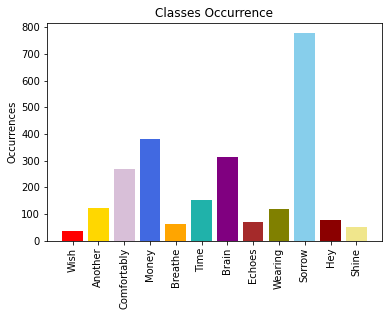

In [29]:
c = ['red', 'gold', 'thistle', 'royalblue', 'orange', 'lightseagreen', 'purple', 'brown', 'olive', 'skyblue', 'darkred', 'khaki']
plt.bar(classes, count, color = c)
plt.title("Classes Occurrence")
plt.ylabel("Occurrences")
plt.xticks(rotation=90)
plt.yticks
plt.show()

In [39]:
def inspect_activity():
    data = y_train[:500]
    axis = data.plot(subplots=True, figsize=(17, 9))
    for ax in axis:
        ax.legend(loc='lower right')

In [ ]:
inspect_activity()

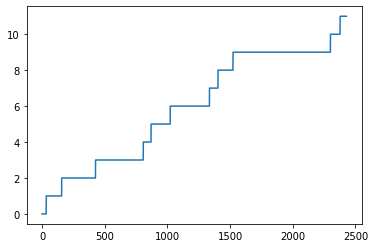

In [46]:
plt.plot(y_train)

###Utils functions

In [ ]:
def plot_confusionMatrix(y_test, predictions, label_mapping):
  # Compute the confusion matrix
  cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

  # Compute the classification metrics
  accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
  precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(10,8))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()


Metadata

In [ ]:
window = 200
stride = 50
telescope = 27

In [ ]:
input_shape = x_train.shape
#classes = number of train data
batch_size = 128
epochs = 200

#LSTM

In [ ]:
def build_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_LSTM_classifier(input_shape, classes)
model.summary()

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Save best epoch model
model.save("LSTM")

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#BiLSTM

In [ ]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_BiLSTM_classifier(input_shape, classes)
model.summary()

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('BiLSTM')

In [ ]:
# Predict the test set with the BiLSTM
predictions = model.predict(X_test)
predictions.shape

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#1D CNN

In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_1DCNN_classifier(input_shape, classes)
model.summary()

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('1DCNN')

In [ ]:
# Predict the test set with the 1DCNN
predictions = model.predict(X_test)
predictions.shape

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)